# Facebook Network Analysis
## By - Ameya Panchpor

In [8]:
import networkx as nx
import os
G = nx.read_edgelist("facebook_combined.txt.gz", nodetype=int)

### 1. Number of Nodes and Edges

In [7]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}, Number of edges: {num_edges}")

Number of nodes: 4039, Number of edges: 88234


### 2. Is the graph connected?

In [11]:
isConnected = nx.is_connected(G)
if isConnected:
    print("Graph is connected")
    connect_comps = nx.number_connected_components(G)
    print(f"Number of connected components: {connect_comps}")
else:
    print("graph is not connected")
connect_comps = nx.number_connected_components(G)

Graph is connected
Number of connected components: 1


### 3. The diameter of the graph

In [12]:
if isConnected:
    diameter = nx.diameter(G)
else:
    largest_cc = max(nx.connected_components(G), key=len)
    diameter = nx.diameter(G.subgraph(largest_cc))
print(f"Diameter of the graph: {diameter}")

Diameter of the graph: 8


### 4. Density of the graph

In [13]:
density = nx.density(G)
print(f"Density of the graph: {density}")

Density of the graph: 0.010819963503439287


### 5. Average clustering coefficient of the graph

In [14]:
avg_clustering = nx.average_clustering(G)
print(f"Average clustering coefficient: {avg_clustering}")

Average clustering coefficient: 0.6055467186200862


### 6. The 2 nodes with the highest closeness, betweenness, eigenvector, pagerank, hubs, and authorities measures

In [20]:

closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:2]

betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:2]

eigenvector_centrality = nx.eigenvector_centrality(G)
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:2]

pagerank = nx.pagerank(G)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:2]

hubs, authorities = nx.hits(G)
top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:2]
top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:2]

print(f"Closeness: {top_closeness}")
print(f"Betweenness: {top_betweenness}")
print(f"Eigenvector: {top_eigenvector}")
print(f"PageRank: {top_pagerank}")
print(f"HITS Hubs: {top_hubs}")
print(f"HITS Authorities: {top_authorities}")


Closeness: [(107, 0.45969945355191255), (58, 0.3974018305284913)]
Betweenness: [(107, 0.4805180785560152), (1684, 0.3377974497301992)]
Eigenvector: [(1912, 0.09540696149067629), (2266, 0.08698327767886552)]
PageRank: [(3437, 0.0076145868447496), (107, 0.006936420955866117)]
HITS Hubs: [(1912, 0.006117289690426149), (2266, 0.005577249346763371)]
HITS Authorities: [(1912, 0.006117289690426144), (2266, 0.005577249346763371)]


### Inference:
By looking at these results, we see that Node 107 is much more influential and central since it appears in multiple centrality measures.

Also, the Nodes 1912 and 2266 appear to have strong connections to other central nodes, and are possibly part of a densely connected cluster as they have high eigenvector and HITS.


### 7. Dispersion between the two nodes with the highest pagerank and closeness measures

In [17]:
top_pagerank = [node for node, _ in top_pagerank]
pgrnk_dispersion = nx.dispersion(G, *top_pagerank)

top_closeness = [node for node, _ in top_closeness]
closeness_dispersion = nx.dispersion(G, *top_closeness)

print(f"PageRank Dispersion: {pgrnk_dispersion}")
print(f"Closeness Dispersion: {closeness_dispersion}")

PageRank Dispersion: 0.0
Closeness Dispersion: 0.0


### Deduction:
Since, both the dispersion values for pagerank and closeness are 0.0, we see that the top two nodes, are equally well connected and influential (from PageRank), and are equally close to the rest of the nodes in the network (from Closeness).
Hence implying that the network does not have any specially dominant nodes and are mostly simialr and uniform to each other in terms of influence and closeness.

### 8. Jaccard Similarity between the two nodes with the highest pagerank and closeness measures

In [19]:
def jaccard_similarity(graph, node1, node2):
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))
    return len(neighbors1 & neighbors2) / len(neighbors1 | neighbors2)

jaccard_pagerank = jaccard_similarity(G, *top_pagerank)

jaccard_closeness = jaccard_similarity(G, *top_closeness)

print(f"PageRank Jaccard Similarity: {jaccard_pagerank}")
print(f"Closeness Jaccard Similarity: {jaccard_closeness}")

PageRank Jaccard Similarity: 0.0006285355122564425
Closeness Jaccard Similarity: 0.0028462998102466793


### Observation:
Since, the Jaccard Similarity between the two nodes with the highest pagerank and closeness measures is very low, this indicates that the network is mostly decentralized and highly distributed. That is, the network is likely to be more spread out and not have many large, densely connected communities.


### 9. Community detection

In [24]:
from networkx.algorithms.community import greedy_modularity_communities
communities_greedy = list(greedy_modularity_communities(G))

print(f"Number of communities: {len(communities_greedy)}")

Number of communities: 13


### 10. Visualizing of the communities

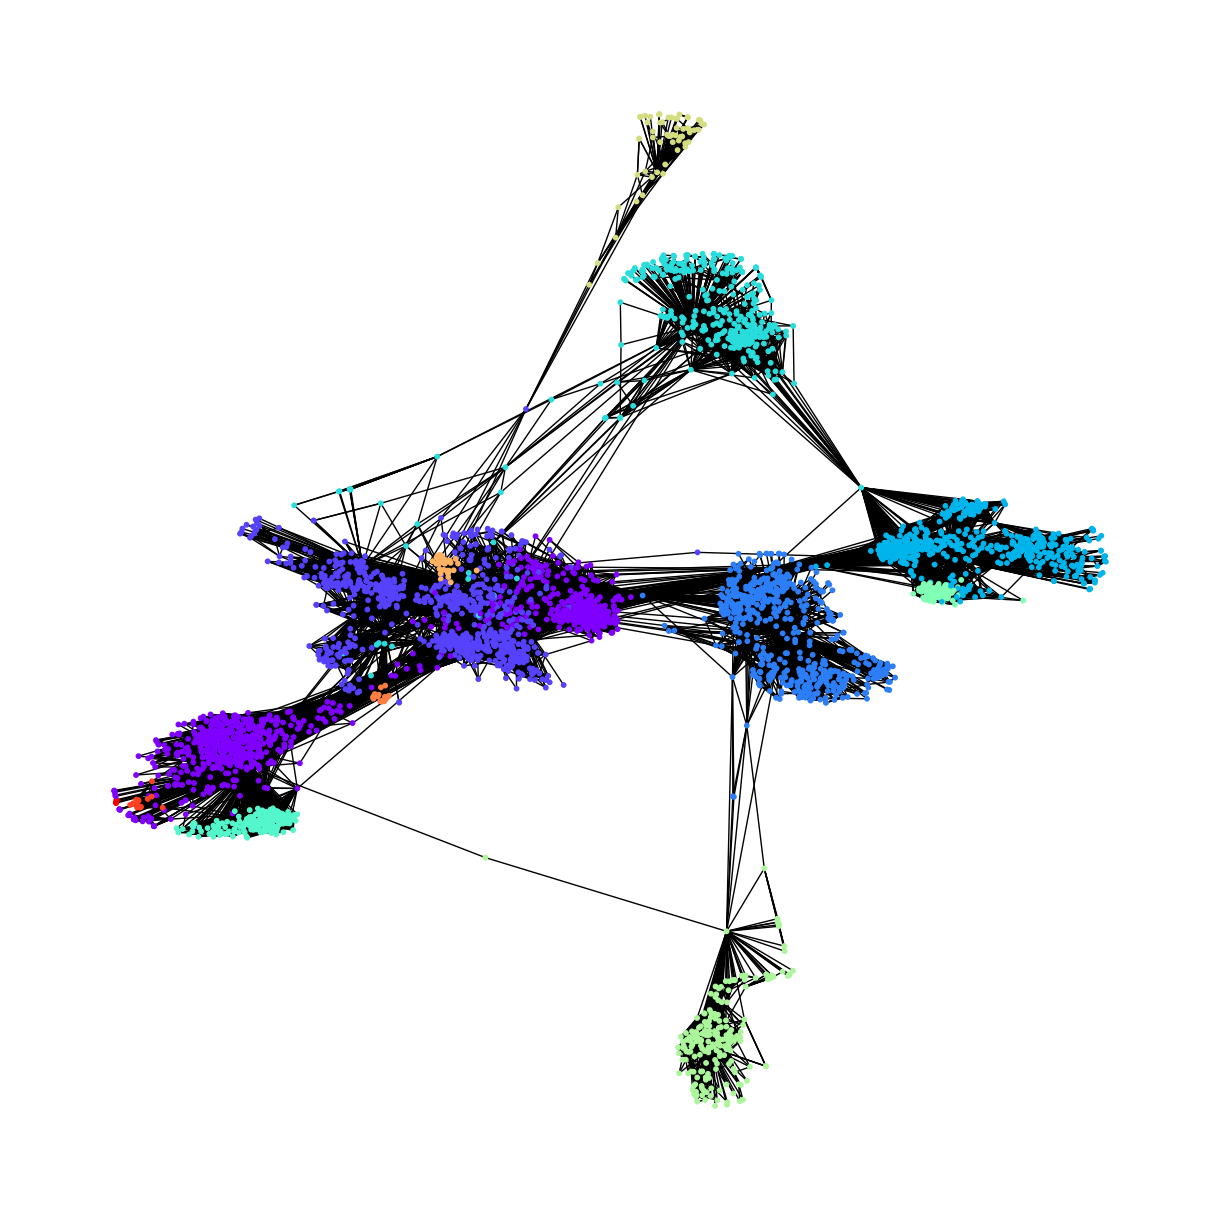

In [25]:
import matplotlib.pyplot as plt

color_map = {node: i for i, community in enumerate(communities_greedy) for node in community}
node_colors = [color_map[node] for node in G.nodes()]

plt.figure(figsize=(12, 12))
nx.draw(G, node_color=node_colors, with_labels=False, node_size=10, cmap=plt.cm.rainbow)
plt.show()

## References:
Matlplotlib - Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science &amp; Engineering, 9(3), 90–95.